# Importing Package

In [29]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering and Analysis

In [30]:
data=pd.read_csv("C:\\Users\\91948\\Downloads\\Train.csv")

In [31]:
data.shape

(8523, 12)

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
data.shape

(8523, 12)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Pre-Processing

In [35]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(5, 5)

In [36]:
%matplotlib inline

<AxesSubplot:>

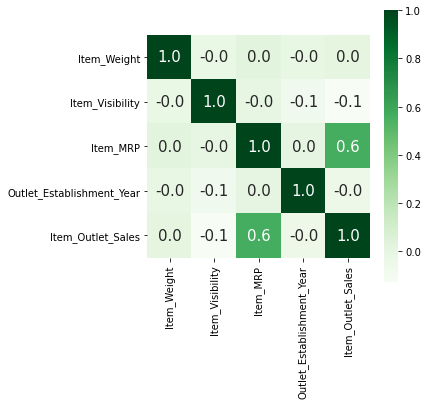

In [37]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [38]:
categorical_features = data.select_dtypes(include='object')
non_categorical_features = data.select_dtypes(exclude='object')

In [39]:
non_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [40]:
for i in categorical_features:
    categorical_features[i]=categorical_features[i].replace(np.nan,"Not Provided",regex=True)

<ipython-input-40-f97939b0267c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[i]=categorical_features[i].replace(np.nan,"Not Provided",regex=True)


In [45]:
for i in non_categorical_features:
    non_categorical_features[i]=non_categorical_features[i].replace(np.nan,0,regex=True)

<ipython-input-45-c17023cfedf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_features[i]=non_categorical_features[i].replace(np.nan,0,regex=True)


In [46]:
non_categorical_features = pd.DataFrame(non_categorical_features)

In [47]:
non_categorical_features.rename(columns={0:'Item_Weight',1:'Item_Visibility',2:'Item_MRP',3:'Outlet_Establishment_Year',
                                        4:'Item_Outlet_Sales'},inplace=True)

In [48]:
non_categorical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [49]:
print(sum(categorical_features.isnull().sum()))
print(sum(non_categorical_features.isnull().sum()))

0
0


In [50]:
data = pd.concat([categorical_features,non_categorical_features],axis=1)

In [51]:
data.shape

(8523, 12)

In [52]:
data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,1999,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,2009,443.4228
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,1999,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Not Provided,Tier 3,Grocery Store,19.200,0.000000,182.0950,1998,732.3800
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,1987,2778.3834
8519,FDS36,Regular,Baking Goods,OUT045,Not Provided,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,2002,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,2004,1193.1136
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,2009,1845.5976


# Data Split

In [53]:
#Data Extraction
y = data.Item_Outlet_Sales
#X = data.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
X = data.iloc[:,0:10]
Actual_Item_Outlet_Sales = pd.DataFrame(data.Item_Outlet_Sales)[:]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3,random_state=42)

# Model Building

In [55]:
#Model Building
lr = LinearRegression()
lr.fit(X_train,y_train)

ValueError: could not convert string to float: 'FDN08'

In [56]:
#We may have to encode the data to proceed further
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
X= X.apply(LabelEncoder().fit_transform)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=42)

In [58]:
#Model Building
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Prediction

In [59]:
predicted_lm_score = lr.predict(X_test)

In [60]:
predicted_lm_score

array([ 910.50878092,  617.90196634, 1044.75619577, ...,  434.34287826,
       1328.67686197, 1559.31243247])

In [61]:
#Calcuating R Square
lr.score(X_test,y_test)

0.5233419521659666

# Optimization and Hyper Parameter Tuning

In [62]:
#Lasso Regression(L1 Regularization)

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lassoReg = Lasso()

In [65]:
lassoReg.fit(X_train,y_train)

Lasso()

In [66]:
pred = lassoReg.predict(X_test)

In [67]:
#Calcuating R Square
lassoReg.score(X_test,y_test)

0.5232672101223829

In [68]:
#Ridge Regrssion(L2 Regularization)

In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridgeReg = Ridge(max_iter=5000)

In [71]:
ridgeReg.fit(X_train,y_train)

Ridge(max_iter=5000)

In [72]:
pred = ridgeReg.predict(X_test)

In [73]:
ridgeReg.score(X_test,y_test)

0.523328483851554

In [74]:
predicted_lm_score = pd.DataFrame(predicted_lm_score)

In [75]:
predicted_lm_score.head()

,0
0,910.508781
1,617.901966
2,1044.756196
3,4180.871220
4,3146.592703


In [76]:
predicted_lm_score.shape

(1705, 1)

In [77]:
y_test.shape

(1705,)

In [78]:
y_test.head()

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

# Checking the Indvividual Features to understand in depth

In [79]:
data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,1999,3735.1380
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,2009,443.4228
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,1999,2097.2700
3,FDX07,Regular,Fruits and Vegetables,OUT010,Not Provided,Tier 3,Grocery Store,19.200,0.000000,182.0950,1998,732.3800
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,6.865,0.056783,214.5218,1987,2778.3834
8519,FDS36,Regular,Baking Goods,OUT045,Not Provided,Tier 2,Supermarket Type1,8.380,0.046982,108.1570,2002,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,10.600,0.035186,85.1224,2004,1193.1136
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,7.210,0.145221,103.1332,2009,1845.5976


In [80]:
def testCoefs():
    #Data Extraction
    y = data.Item_Outlet_Sales

    X = data.loc[:,'Item_Identifier']
    #X = data.loc[:,['Outlet_Type','Item_Fat_Content','Outlet_Identifier','Outlet_Location_Type']]
    #X = data.loc[:,['Outlet_Establishment_Year','Item_MRP']]
    X = data.iloc[:,0:10]
    Actual_Item_Outlet_Sales = pd.DataFrame(data.Item_Outlet_Sales)[:]


    #Label Encoding

    #We may have to encode the data to proceed further
    from sklearn import preprocessing
    from sklearn.preprocessing import LabelEncoder
    X= X.apply(LabelEncoder().fit_transform)


    #Data Split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3,random_state=42)

    #Model Building
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    coeff = pd.DataFrame(X_train.columns)
    coeff['Coefficient Estimate'] = pd.Series(lr.coef_)
    print(coeff)
    
    print(lr.score(X_test,y_test))
    
    return coeff


In [81]:
testCoefs()

                      0  Coefficient Estimate
0       Item_Identifier              0.006171
1      Item_Fat_Content             52.416935
2             Item_Type             -1.049582
3     Outlet_Identifier             42.175504
4           Outlet_Size           -105.577379
5  Outlet_Location_Type           -191.461583
6           Outlet_Type            908.765467
7           Item_Weight              0.701815
8       Item_Visibility             -0.030000
9              Item_MRP              0.584808
0.5099153183977291


,0,Coefficient Estimate
0,Item_Identifier,0.006171
1,Item_Fat_Content,52.416935
2,Item_Type,-1.049582
3,Outlet_Identifier,42.175504
4,Outlet_Size,-105.577379
5,Outlet_Location_Type,-191.461583
6,Outlet_Type,908.765467
7,Item_Weight,0.701815
8,Item_Visibility,-0.030000
9,Item_MRP,0.584808
